In [1]:
import numpy as np 
import pandas as pd 
from scipy import stats
import calendar
import matplotlib as plt
import seaborn as sns
df = pd.read_csv('data/train.csv')
df['Date']=pd.to_datetime(df['Date'], format='%Y%m', errors='ignore')
df=df.sort_values('Date')

In [2]:
df['UID'].describe()

count          766787
unique           3000
top       Id_e45a5dc5
freq             2476
Name: UID, dtype: object

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(456.6815721253156,
 0.9995355674904427,
 561,
 array([[ 0.07653061,  0.06122449,  0.17346939,  0.06632653,  0.06122449,
          0.05102041,  0.05612245,  0.10714286,  0.04081633,  0.20408163,
          0.06122449,  0.04081633],
        [ 0.07653061,  0.06122449,  0.17346939,  0.06632653,  0.06122449,
          0.05102041,  0.05612245,  0.10714286,  0.04081633,  0.20408163,
          0.06122449,  0.04081633],
        [ 0.07653061,  0.06122449,  0.17346939,  0.06632653,  0.06122449,
          0.05102041,  0.05612245,  0.10714286,  0.04081633,  0.20408163,
          0.06122449,  0.04081633],
        [ 0.22959184,  0.18367347,  0.52040816,  0.19897959,  0.18367347,
          0.15306122,  0.16836735,  0.32142857,  0.12244898,  0.6122449 ,
          0.18367347,  0.12244898],
        [ 3.82653061,  3.06122449,  8.67346939,  3.31632653,  3.06122449,
          2.55102041,  2.80612245,  5.35714286,  2.04081633, 10.20408163,
          3.06122449,  2.04081633],
        [ 0.07653061,  0.06122449

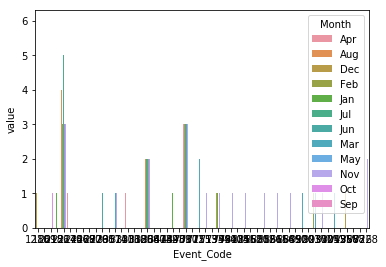

In [3]:
#Single user data for uid = Id_e45a3682
pat1 = df.loc[df['UID'] == 'Id_e45a3682']
#converting date to month for pattern 
pat1['Month'] = pat1['Date'].dt.month.apply(lambda x: calendar.month_abbr[x])
#pat1['Month'] = pat1['Month']
#print(pat1)
patientTab = pd.crosstab(pat1['Event_Code'],pat1['Month'])
stacked = patientTab.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.Event_Code, y=stacked.value, hue=stacked.Month)

#print(patientTab)
stats.chi2_contingency(patientTab,correction=False)

In [4]:
#Eda on all data yet 
df['Month'] = df['Date'].dt.month.apply(lambda x: calendar.month_abbr[x])


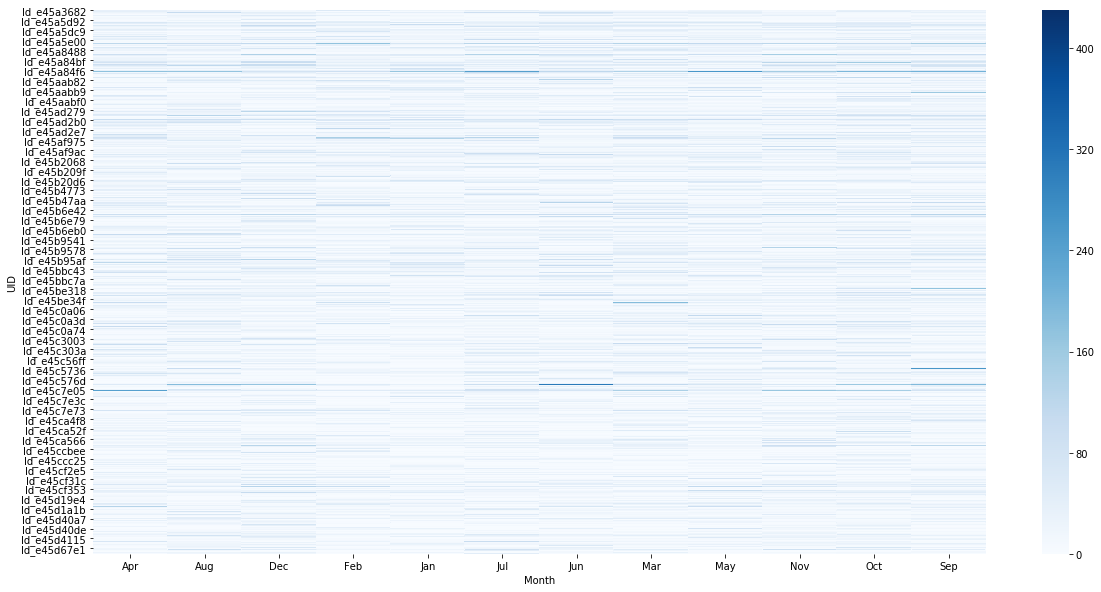

In [7]:
user_visit_table = pd.crosstab(df['UID'],df['Month'])
#stacked = user_visit_table.stack().reset_index().rename(columns={0:'value'})
#sns.barplot(x=stacked.UID, y=stacked.value, hue=stacked.Month)
#print(user_visit_table)
plt.pyplot.figure(figsize=(20, 10))
sns.heatmap(user_visit_table,cmap="Blues")

In [8]:
stats.chi2_contingency(user_visit_table,correction=False)

(408518.4892823134,
 0.0,
 32989,
 array([[16.34255667, 16.55650396, 16.77735277, ..., 16.75715942,
         17.33944368, 16.91870624],
        [11.42311359, 11.57265838, 11.72702719, ..., 11.71291245,
         12.11991727, 11.82583038],
        [39.68906619, 40.20865247, 40.74499959, ..., 40.69595859,
         42.11007751, 41.08828658],
        ...,
        [10.75607046, 10.89688271, 11.04223728, ..., 11.02894676,
         11.41218487, 11.13527094],
        [15.50875276, 15.71178437, 15.92136539, ..., 15.90220231,
         16.45477818, 16.05550694],
        [ 8.5047999 ,  8.61613981,  8.73107134, ...,  8.72056256,
          9.02358804,  8.80463284]]))

In [9]:
event_freq_table = pd.crosstab(df['Event_Code'],df['Month'])
#print(event_freq_table)
stats.chi2_contingency(event_freq_table,correction=False)

(101091.10222315381,
 0.0,
 71181,
 array([[0.33352156, 0.33788784, 0.34239495, ..., 0.34198285, 0.3538662 ,
         0.34527972],
        [0.08338039, 0.08447196, 0.08559874, ..., 0.08549571, 0.08846655,
         0.08631993],
        [0.58366274, 0.59130371, 0.59919117, ..., 0.59846998, 0.61926585,
         0.60423951],
        ...,
        [0.16676078, 0.16894392, 0.17119748, ..., 0.17099142, 0.1769331 ,
         0.17263986],
        [0.08338039, 0.08447196, 0.08559874, ..., 0.08549571, 0.08846655,
         0.08631993],
        [0.9171843 , 0.92919155, 0.94158612, ..., 0.94045282, 0.97313204,
         0.94951923]]))